In [1]:
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

c:\users\bksin\desktop\machine learning - regression course\env\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe["power_1"] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = "power_" + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda i: i**power)
    #print(poly_dataframe)
    return poly_dataframe

In [3]:
def get_formula(dataset, target):
    formula = target + " ~ "
    counter = 0
    covariates = sorted(list(set(list(dataset)) - set([target])))
    length = len(covariates)
    for x in covariates:
            formula += x
            counter += 1
            if counter < length:
                formula += " + "
    return formula

In [4]:
def make_polynomial_model(data,target_variable,feature_variable,degree):
    poly = polynomial_dataframe(data[feature_variable], degree)
    poly[target_variable] = data[target_variable]
    print(get_formula(poly,target_variable))
    model = smf.ols(get_formula(poly,target_variable), data = poly)
    return (poly, model.fit())

In [5]:
def get_RSS(y, y_hat):
    error = y - y_hat
    RSS = sum(map(lambda x: x*x,error))
    return RSS

In [6]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 
              'sqft_lot':int, 'view':int}
sales = pd.read_csv("kc_house_data.csv", dtype=dtype_dict)
sales = sales.sort_values(["sqft_living","price"])
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0
21332,9266700190,20150511T000000,245000.0,1.0,1.00,390.0,2000,1,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340.0,5100.0
8623,6303400395,20150130T000000,325000.0,1.0,0.75,410.0,8636,1,0,0,...,4,410,0,1953,0,98146,47.5077,-122.357,1190.0,8636.0
11500,4322200105,20150331T000000,229050.0,1.0,1.00,420.0,3298,1,0,0,...,4,420,0,1949,0,98136,47.5375,-122.391,1460.0,4975.0
14466,7549801385,20140612T000000,280000.0,1.0,0.75,420.0,6720,1,0,0,...,5,420,0,1922,0,98108,47.5520,-122.311,1420.0,6720.0
465,8658300340,20140523T000000,80000.0,1.0,0.75,430.0,5050,1,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200.0,7500.0


price ~ power_1
Intercept   -43580.743094
power_1        280.623568
dtype: float64


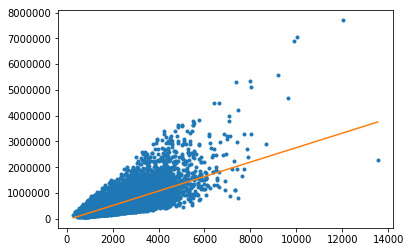

In [7]:
(poly1_data, model1_results) = make_polynomial_model(sales,"price","sqft_living",1)
plt.plot(poly1_data["power_1"],poly1_data["price"],'.',
         poly1_data["power_1"], model1_results.predict(poly1_data),'-')
print(model1_results.params)

price ~ power_1 + power_2
Intercept    199222.279306
power_1          67.994095
power_2           0.038581
dtype: float64


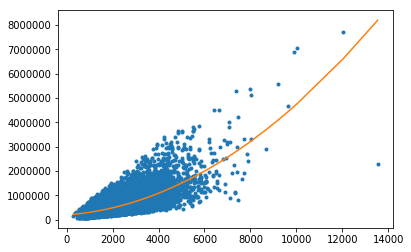

In [8]:
(poly2_data, model2_results) = make_polynomial_model(sales,"price","sqft_living",2)
plt.plot(poly2_data["power_1"],poly2_data["price"],'.',
         poly2_data["power_1"], model2_results.predict(poly2_data),'-')
print(model2_results.params)

price ~ power_1 + power_2 + power_3
Intercept    336819.748247
power_1         -90.181987
power_2           0.087047
power_3          -0.000004
dtype: float64


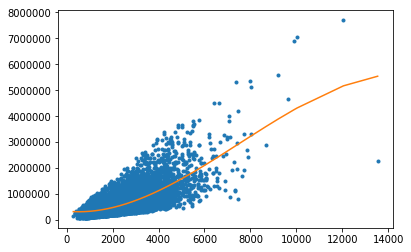

In [9]:
(poly3_data, model3_results) = make_polynomial_model(sales,"price","sqft_living",3)
plt.plot(poly3_data["power_1"],poly3_data["price"],'.',
         poly3_data["power_1"], model3_results.predict(poly3_data),'-')
print(model3_results.params)

In [16]:
(poly4_data, model4_results) = make_polynomial_model(sales,"price","sqft_living",4)
print(model4_results.params)

price ~ power_1 + power_2 + power_3 + power_4
Sum of power^degree =  1.20935827205e+18
Intercept    4.602447e-01
power_1      3.641338e+02
power_2     -1.018670e-01
power_3      2.469470e-05
power_4     -1.304584e-09
dtype: float64


price ~ power_1 + power_10 + power_11 + power_12 + power_13 + power_14 + power_15 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9
Intercept    8.759922e-95
power_1     -1.133564e-50
power_10     1.695646e-55
power_11     8.594898e-52
power_12     4.889655e-48
power_13     1.868057e-44
power_14    -2.886142e-48
power_15     1.112867e-52
power_2      5.896519e-87
power_3      4.987788e-83
power_4      4.261505e-79
power_5      3.650254e-75
power_6      3.111349e-71
power_7      2.617117e-67
power_8      2.150226e-63
power_9      1.701458e-59
dtype: float64


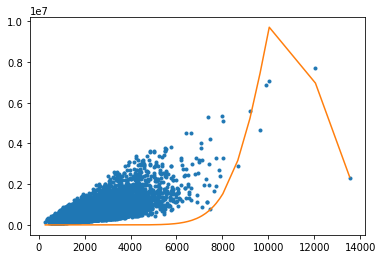

In [10]:
(poly15_data, model15_results) = make_polynomial_model(sales,"price","sqft_living",15)
%matplotlib inline
plt.plot(poly15_data["power_1"],poly15_data["price"],'.',
         poly15_data["power_1"], model15_results.predict(poly15_data),'-')
print(model15_results.params)

price ~ power_1 + power_10 + power_11 + power_12 + power_13 + power_14 + power_15 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9
Intercept    6.998479e-94
power_1      8.417524e-50
power_10     1.452993e-55
power_11     2.365357e-51
power_12     1.249831e-47
power_13     4.466425e-44
power_14    -6.956928e-48
power_15     2.702043e-52
power_2      3.954381e-86
power_3      3.021939e-82
power_4      2.321311e-78
power_5      1.784686e-74
power_6      1.366532e-70
power_7      1.035548e-66
power_8      7.699040e-63
power_9      5.543921e-59
dtype: float64


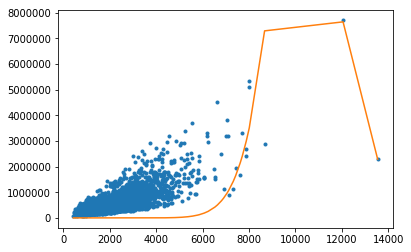

In [11]:
sales_subset1 = pd.read_csv("wk3_kc_house_set_1_data.csv", dtype=dtype_dict)
sales_subset1 = sales_subset1.sort_values(["sqft_living","price"])
(poly15_subset1, model15_subset1_results) = make_polynomial_model(sales_subset1,"price","sqft_living",15)
%matplotlib inline
plt.plot(poly15_subset1["power_1"],poly15_subset1["price"],'.',
         poly15_subset1["power_1"], model15_subset1_results.predict(poly15_subset1),'-')
print(model15_subset1_results.params)

price ~ power_1 + power_10 + power_11 + power_12 + power_13 + power_14 + power_15 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9
Intercept    3.517945e-90
power_1     -1.159095e-48
power_10     6.085340e-53
power_11     2.627828e-49
power_12     9.660086e-46
power_13     2.391397e-42
power_14    -5.717156e-46
power_15     3.390889e-50
power_2      9.940751e-83
power_3      5.395021e-79
power_4      2.947140e-75
power_5      1.611527e-71
power_6      8.767063e-68
power_7      4.710594e-64
power_8      2.476073e-60
power_9      1.256132e-56
dtype: float64


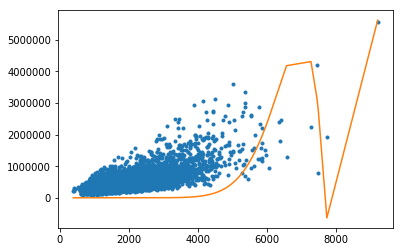

In [12]:
sales_subset2 = pd.read_csv("wk3_kc_house_set_2_data.csv", dtype=dtype_dict)
sales_subset2 = sales_subset2.sort_values(["sqft_living","price"])
(poly15_subset2, model15_subset2_results) = make_polynomial_model(sales_subset2,"price","sqft_living",15)
%matplotlib inline
plt.plot(poly15_subset2["power_1"],poly15_subset2["price"],'.',
         poly15_subset2["power_1"], model15_subset2_results.predict(poly15_subset2),'-')
print(model15_subset2_results.params)

price ~ power_1 + power_10 + power_11 + power_12 + power_13 + power_14 + power_15 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9
Intercept    9.177576e-92
power_1     -1.997825e-50
power_10     9.747060e-54
power_11     3.624982e-50
power_12     1.545534e-46
power_13     4.435903e-43
power_14    -8.990862e-47
power_15     4.562005e-51
power_2      3.539253e-84
power_3      2.240161e-80
power_4      1.425327e-76
power_5      9.068303e-73
power_6      5.735295e-69
power_7      3.580264e-65
power_8      2.185417e-61
power_9      1.287004e-57
dtype: float64


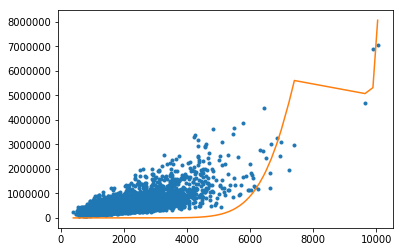

In [13]:
sales_subset3 = pd.read_csv("wk3_kc_house_set_3_data.csv", dtype=dtype_dict)
sales_subset3 = sales_subset3.sort_values(["sqft_living","price"])
(poly15_subset3, model15_subset3_results) = make_polynomial_model(sales_subset3,"price","sqft_living",15)
%matplotlib inline
plt.plot(poly15_subset3["power_1"],poly15_subset3["price"],'.',
         poly15_subset3["power_1"], model15_subset3_results.predict(poly15_subset3),'-')
print(model15_subset3_results.params)

price ~ power_1 + power_10 + power_11 + power_12 + power_13 + power_14 + power_15 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9
Intercept    1.071061e-79
power_1      7.476428e-39
power_10     8.932044e-44
power_11     2.293862e-40
power_12     3.687808e-37
power_13    -1.549908e-40
power_14     2.163277e-44
power_15    -1.002503e-48
power_2      1.796402e-72
power_3      7.504120e-69
power_4      3.143060e-65
power_5      1.309315e-61
power_6      5.369494e-58
power_7      2.139757e-54
power_8      8.138815e-51
power_9      2.876162e-47
dtype: float64


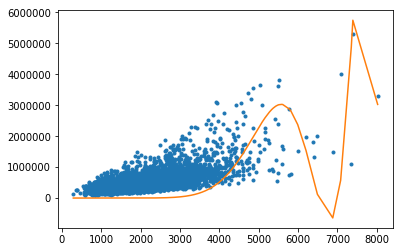

In [14]:
sales_subset4 = pd.read_csv("wk3_kc_house_set_4_data.csv", dtype=dtype_dict)
sales_subset4 = sales_subset4.sort_values(["sqft_living","price"])
(poly15_subset4, model15_subset4_results) = make_polynomial_model(sales_subset4,"price","sqft_living",15)
%matplotlib inline
plt.plot(poly15_subset4["power_1"],poly15_subset4["price"],'.',
         poly15_subset4["power_1"], model15_subset4_results.predict(poly15_subset4),'-')
print(model15_subset4_results.params)

In [15]:
sales_train = pd.read_csv("wk3_kc_house_train_data.csv", dtype=dtype_dict)
sales_train = sales_train.sort_values(["sqft_living","price"])
sales_test = pd.read_csv("wk3_kc_house_test_data.csv", dtype=dtype_dict)
sales_test = sales_test.sort_values(["sqft_living","price"])
sales_validate = pd.read_csv("wk3_kc_house_valid_data.csv", dtype=dtype_dict)
sales_validate = sales_validate.sort_values(["sqft_living","price"])

In [16]:
model_data_train = []
model_data_validate = []
model_poly = []
RSS_validate = []
degree = 15
for i in range(1,degree+1):
    (m_d, m_p) = make_polynomial_model(sales_train,"price","sqft_living",i)
    model_data_train.append(m_d)
    model_poly.append(m_p)
    model_data_validate.append(polynomial_dataframe(sales_validate["sqft_living"], degree))
    model_data_validate[i-1]["price"] = sales_validate["price"]
    RSS_validate.append(get_RSS(model_data_validate[i-1]["price"], m_p.predict(model_data_validate[i-1])))

price ~ power_1
price ~ power_1 + power_2
price ~ power_1 + power_2 + power_3
price ~ power_1 + power_2 + power_3 + power_4
price ~ power_1 + power_2 + power_3 + power_4 + power_5
price ~ power_1 + power_2 + power_3 + power_4 + power_5 + power_6
price ~ power_1 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7
price ~ power_1 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8
price ~ power_1 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9
price ~ power_1 + power_10 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9
price ~ power_1 + power_10 + power_11 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9
price ~ power_1 + power_10 + power_11 + power_12 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9
price ~ power_1 + power_10 + power_11 + power_12 + power_13 + power_2 + power_3 + power_4 + power_5 + power_6 + power_7 + power_8 + power_9
pr

In [17]:
degree_with_min_RSS = RSS_validate.index(min(RSS_validate)) + 1
print(RSS_validate)
print(min(RSS_validate))
print("Index = ", degree_with_min_RSS)

[629097886299585.6, 623955062706492.1, 625820279379022.6, 607741064156622.0, 635093791933954.8, 1777693048341625.5, 1.0074292943112162e+16, 4.8507227524705304e+16, 2.183376619077093e+17, 9.459798860347635e+17, 2.1064291469539696e+17, 5.241891122299767e+17, 1.4203156003860024e+18, 4.0264955122870446e+18, 1.1652998581556933e+19]
607741064156622.0
Index =  4


In [18]:
model_data_test = polynomial_dataframe(sales_test["sqft_living"], degree_with_min_RSS)
model_data_test["price"] = sales_test["price"]
RSS_test = get_RSS(model_data_test["price"], 
                   model_poly[degree_with_min_RSS-1].predict(model_data_test))
"{:,.0f}".format(RSS_test)

'138,942,402,481,972'